21 905


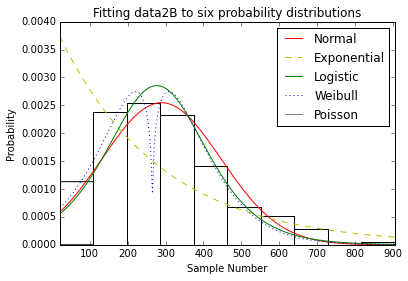

In [6]:
#!/usr/bin/env python
'''
Problem Set 2Bb: Probability Distributions and hypothesis testing 
Use the fitdist (MATLAB) function to fit the data to each of these six probability distributions: 
- Exponential 
- Poisson 
- Normal 
- Negative Binomial
- Logistic 
- Weibull. (using double Weibull)
'''
from scipy import stats
from scipy.misc import factorial
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data2B = [
    59, 449, 209, 405, 207, 304, 632, 492, 422, 55,
    49, 527, 401, 633, 115, 73, 241, 240, 379, 363,
    65, 126, 386, 100, 117, 100, 244, 69, 278, 423,
    247, 326, 301, 333, 403, 179, 360, 501, 169, 21,
    388, 428, 325, 127, 42, 387, 163, 153, 291, 707,
    290, 454, 226, 322, 503, 276, 58, 114, 440, 495,
    307, 180, 349, 227, 176, 338, 212, 166, 177, 534,
    330, 281, 286, 136, 601, 179, 307, 296, 250, 598,
    62, 326, 190, 226, 217, 242, 201, 292, 316, 216,
    419, 905, 150, 362, 150, 329, 499, 401, 75, 168,
    355, 116, 54, 227, 476, 158, 332, 162, 110, 269,
    116, 171, 212, 188, 302, 92, 234, 376, 174, 208, 
    508, 303, 151, 284, 404, 181, 327, 148, 435, 284,
    233, 160, 163, 441, 219, 556, 396, 224, 119, 293, 
    669, 213, 328, 89, 227, 720, 179, 690, 309, 517,
    241, 582, 317, 87, 207, 288, 138, 379, 381, 220,
    351, 150, 56, 107, 357, 239, 565, 486, 278, 127,
    209, 206, 542, 97, 243, 176, 190, 155, 379, 364,
    581, 330, 421, 283, 330, 232, 354, 293, 305, 363,
    256, 237, 381, 156, 272, 356, 643, 572, 159, 217
    ]

# functions for curve_fit()
def choose(n, k):
    """returns n choose k: n!/(k!(n - k)!)"""
#     print "n = ", n
#     print "k = ", k
    f = factorial
    return f(n) / f(k) / f(n - k)

# def chooseinv(n, k):
#     """returns n choose k: n!/(k!(n - k)!)"""
#     f = factorial
#     return 1 / f(n) * f(k) * f(n - k)

def poisson(k, lamb):
    """returns poisson probability of k occurring at interval lamb"""
    return (lamb**k / factorial(k)) * np.exp(-lamb)

def nbinom(n, r, theta):
    """return probability of r-th succcess occcurs at n-th trial with theta success probability"""
    return choose(r + n - 1, n) * theta**r * (1 - theta)**n

# def nbinominv(n, r, theta):
#     """return inverse probability with of r-th succcess occcurs at n-th trial with theta success probability"""
#     a = chooseinv(r + n - 1, n)
#     b = 1 / (theta**r)
#     c = 1 / ((1 - theta)**n)
#     return a * b * c
    
# plot normed histogram
entries, bin_edges, patches = plt.hist(data2B, color = 'white', normed = True) 

# x bounds for computing theoretical distribution
size, x_min, x_max = len(data2B), min(data2B), max(data2B)
dataxrange = np.linspace(x_min, x_max, len(data2B)) # ndarray
print x_min, x_max

# calculate x-values for discrete probability distribution curve_fit() 
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1]) # find the x value points for pmf (ndarray)

# Generate a fit to the Normal distribution
mean, stdev = stats.norm.fit(data2B) # get params 
pdf_norm = stats.norm.pdf(dataxrange, mean, stdev) # now get theoretical values in our interval 

# Generate a fit to a Exponential distribution
mean1, stdev1 = stats.expon.fit(data2B) # get params 
pdf_expon = stats.expon.pdf(dataxrange, mean1, stdev1) # now get theoretical values in our interval  

# Generate a fit to a Negative binomial distribution 
# parameters1, cov_matrix1 = curve_fit(nbinom, bin_middles, entries, check_finite = False) # get params; g avoids zeros
# # parameters1, cov_matrix1 = curve_fit(nbinom, bin_middles, entries, p0 = curve_fit(nbinominv, bin_middles, 1/entries)[0]) # get params; g avoids zeros
# pmf_nbinom = nbinom(dataxrange, *parameters1) # now get theoretical values in our interval  

# Generate a fit to a logistic distribution
mean3, stdev3 = stats.logistic.fit(data2B) # get params  
pdf_logistic = stats.logistic.pdf(dataxrange, mean3, stdev3) # now get theoretical values in our interval  

# Generate a fit to a Weibull distribution
shape4, mean4, stdev4 = stats.dweibull.fit(data2B) # get params  
pdf_dweibull = stats.dweibull.pdf(dataxrange, shape4, mean4, stdev4) # now get theoretical values in our interval  

# Generate a fit to a Poisson distribution
parameters, cov_matrix = curve_fit(poisson, bin_middles, entries) # get params
pmf_poisson = poisson(dataxrange, *parameters) # now get theoretical values in our interval 

# # plot curve fits
plt.plot(dataxrange, pdf_norm, 'r-', label = "Normal") 
plt.plot(dataxrange, pdf_expon, 'y--', label = "Exponential")
plt.plot(dataxrange, pdf_logistic, 'g-', label = "Logistic")
plt.plot(dataxrange, pdf_dweibull, 'b:', label = "Weibull")
# plt.plot(dataxrange, pmf_binom, color = 'o.', label = "Negative Binomial")
plt.plot(dataxrange, pmf_poisson, color = 'grey', label = "Poisson")

# format figure
plt.title("Fitting data2B to six probability distributions")
plt.ylabel("Probability")
plt.xlabel("Sample Number")
plt.xlim(21, 905) # constrain for theoretical space
plt.ylim(0, .004) 

plt.legend(loc = 'upper right')
plt.show()  

In [ ]:
#!/usr/bin/env python
'''
Problem Set 2Bc: Probability Distributions and hypothesis testing 

Use the qqplot function to plot the data against the fit distribution. Comment on how well/poorly the data fits to each of the distributions.
'''

import numpy as np 
import pylab as plt
import scipy.stats as stats

%matplotlib inline

# define the y-value range
entries = [0.09529255, 0.15818563, 0.18296169, 0.15246808, 0.09529255, 0.0933867, 0.0971984, 0.089575, 0.06670478, 0.08004574]

# calculate x-values for discrete probability distribution curve_fit() 
bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1]) # find the x value points for pmf (ndarray)

# define distribution list and parameters
dist_list = ['expon', 'poisson', 'normal', 'nbinom', 'logistic', 'dweibull']  
params_poisson = curve_fit(poisson, bin_middles, entries)[0] # poisson shape parameter

# define figure and axes
fig, ax = plt.subplots(3, 2, figsize = [16, 12])

# create axes list
ax_list = [ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1], ax[2, 0], ax[2, 1]]

# Add titles
fig.suptitle("Q-Q plots of data2B against six probability distributions", fontsize = 25)
ax[0,0].set_title("data2B against an Exponential distribution")
ax[0,1].set_title("data2B against a Normal distribution")
ax[1,0].set_title("data2B against a Poisson distribution")
ax[1,1].set_title("data2B against a Negative Binomial distribution")
ax[2,0].set_title("data2B against a Logistic distribution")
ax[2,1].set_title("data2B against a Weibull distribution")

stats.probplot(entries, dist="expon", plot=plt.ax[0,0])
stats.probplot(entries, dist="norm", plot=plt)
stats.probplot(entries, sparams = param_poisson, dist="poisson", plot=plt)
stats.probplot(entries, dist="logistic", plot=plt)
stats.probplot(entries, dist="dweibull", plot=plt)

# plt.show
plt.show()

In [ ]:
[  1.13122172e-03   2.37556561e-03   2.54524887e-03   2.31900452e-03
   1.41402715e-03   6.78733032e-04   5.09049774e-04   2.82805430e-04
   0.00000000e+00   5.65610860e-05]

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 1.0
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 1.0
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 1.0
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 1.0000000149
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 1.65509189888
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 1.65509192355
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 2.01178206212
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 2.0117820921
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 2.06316537424
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 2.06316540498
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 2.06486485075
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 2.06486488152
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 2.06490173702
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 2.06490176779
[  0.   1.   2.   3.   4.   5.   6.   

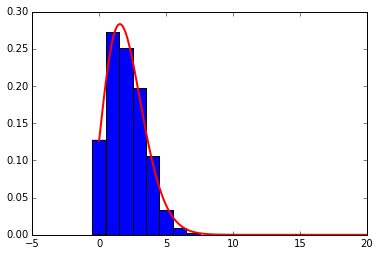

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.misc import factorial


# get poisson deviated random numbers
data = np.random.poisson(2, 1000)

# the bins should be of integer width, because poisson is an integer distribution
entries, bin_edges, patches = plt.hist(data, bins=11, range=[-0.5, 10.5], normed=True)

# calculate binmiddles
bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])

# poisson function, parameter lamb is the fit parameter
def poisson(k, lamb):
    print k, lamb
    return (lamb**k/factorial(k)) * np.exp(-lamb)

# fit with curve_fit
parameters, cov_matrix = curve_fit(poisson, bin_middles, entries) 
print 'parameters: ', parameters

# plot poisson-deviation with fitted parameter
x_plot = np.linspace(0, 20, 1000)

plt.plot(x_plot, poisson(x_plot, *parameters), 'r-', lw=2)
plt.show()